In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
#Download the auto-mpg dataset and do the following:
#1. Drop column Origin from the dataset.
df=pd.read_csv('auto-mpg .csv')
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,CAR Number
0,18,8,307.0,130,3504,12.0,70.0,1,chevrolet chevelle malibu,L6V 043
1,15,8,350.0,165,3693,11.5,70.0,1,buick skylark 320,RTY079
2,18,8,318.0,150,3436,11.0,70.0,1,plymouth satellite,MTP600
3,16,8,304.0,150,3433,12.0,70.0,1,amc rebel sst,MNJ000
4,17,8,302.0,140,3449,10.5,70.0,1,ford torino,JEETMEET
...,...,...,...,...,...,...,...,...,...,...
93,14,8,318.0,150,4237,14.5,73.0,1,plymouth fury gran sedan,FGTEE4
94,13,8,440.0,215,4735,11.0,73.0,1,chrysler new yorker brougham,GTTYR6
95,12,8,455.0,225,4951,11.0,73.0,1,buick electra 225 custom,TTGGT53
96,13,8,360.0,175,3821,11.0,73.0,1,amc ambassador brougham,TGTYY67


In [11]:
#1. Drop column Origin from the dataset.
df.drop(columns=['origin'], inplace=True)


In [20]:
#Find out all the missing values in the dataset and replace it with its most
#appropriate replacement.
missing_values = df.isnull().sum()
print (missing_values)
#df.fillna(df.mean(), inplace=True (axis=0))


L/100km            0
cylinders          0
displacement       0
horsepower         0
weight             0
acceleration       2
model year         2
origin             0
car name           0
CAR Number         1
horsepower_bins    0
dtype: int64


In [4]:
# Step 3: Remove duplicate entries for the column 'CAR Number'
df.drop_duplicates(subset=['CAR Number'], inplace=True)


In [17]:
# Step 4: Basic insights
# Display first five and last five rows
print(df.head())
print(df.tail())


   mpg  cylinders  displacement  horsepower  weight  acceleration  model year  \
0   18          8         307.0         130    3504          12.0        70.0   
1   15          8         350.0         165    3693          11.5        70.0   
2   18          8         318.0         150    3436          11.0        70.0   
3   16          8         304.0         150    3433          12.0        70.0   
4   17          8         302.0         140    3449          10.5        70.0   

                    car name CAR Number  
0  chevrolet chevelle malibu    L6V 043  
1          buick skylark 320     RTY079  
2         plymouth satellite     MTP600  
3              amc rebel sst     MNJ000  
4                ford torino   JEETMEET  
    mpg  cylinders  displacement  horsepower  weight  acceleration  \
93   14          8         318.0         150    4237          14.5   
94   13          8         440.0         215    4735          11.0   
95   12          8         455.0         225    495

In [18]:
# Display all column names
print(df.columns)


Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'car name', 'CAR Number'],
      dtype='object')


In [21]:
# Display concise summary
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 90 entries, 0 to 97
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   L/100km          90 non-null     int64   
 1   cylinders        90 non-null     int64   
 2   displacement     90 non-null     float64 
 3   horsepower       90 non-null     int64   
 4   weight           90 non-null     float64 
 5   acceleration     88 non-null     float64 
 6   model year       88 non-null     float64 
 7   origin           90 non-null     int64   
 8   car name         90 non-null     object  
 9   CAR Number       89 non-null     object  
 10  horsepower_bins  90 non-null     category
dtypes: category(1), float64(4), int64(4), object(2)
memory usage: 8.0+ KB
None


,L/100km,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,90.000000,90.000000,90.000000,90.000000,90.000000,88.000000,88.000000,90.000000
mean,18.133333,6.366667,259.516667,132.466667,0.477306,13.954545,71.295455,1.344444
std,5.502196,1.863005,124.299937,47.763274,0.285617,3.046230,1.063059,0.656191
min,9.000000,3.000000,70.000000,46.000000,0.000000,8.000000,70.000000,1.000000
25%,14.000000,4.000000,121.000000,90.000000,0.185699,12.000000,70.000000,1.000000
50%,17.000000,8.000000,303.000000,140.000000,0.495842,13.500000,71.000000,1.000000
75%,22.750000,8.000000,351.000000,165.000000,0.740050,15.500000,72.000000,1.000000
max,31.000000,8.000000,455.000000,225.000000,1.000000,23.500000,73.000000,3.000000


In [10]:
# Display the name of the car with the maximum number of horsepower

max_horsepower_car = df[df['horsepower'] == df['horsepower'].max()]['car name'].iloc[0]
print("Car with maximum horsepower:", max_horsepower_car)


Car with maximum horsepower: pontiac catalina


In [11]:
# Step 5: Rename the 'mpg' column to 'L/100km'
df.rename(columns={'mpg': 'L/100km'}, inplace=True)


In [22]:
df.head()

,L/100km,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,CAR Number,horsepower_bins
0,18,8,307.0,130,0.514108,12.0,70.0,1,chevrolet chevelle malibu,L6V 043,Medium
1,15,8,350.0,165,0.570241,11.5,70.0,1,buick skylark 320,RTY079,Medium
2,18,8,318.0,150,0.493911,11.0,70.0,1,plymouth satellite,MTP600,Medium
3,16,8,304.0,150,0.493020,12.0,70.0,1,amc rebel sst,MNJ000,Medium
4,17,8,302.0,140,0.497772,10.5,70.0,1,ford torino,JEETMEET,Medium


In [13]:
# Step 6: Normalize the 'Weight' column
df['weight'] = (df['weight'] - df['weight'].min()) / (df['weight'].max() - df['weight'].min())
print(df['weight'])

0     0.514108
1     0.570241
2     0.493911
3     0.493020
4     0.497772
        ...   
93    0.731809
94    0.879715
95    0.943867
96    0.608257
97    0.400356
Name: weight, Length: 90, dtype: float64


In [1]:
# Step 7: Rearrange 'horsepower' into three bins
bins = [0, 100, 200, 300]
labels = ['Low', 'Medium', 'High']
df['horsepower_bins'] = pd.cut(df['horsepower'], bins=bins, labels=labels, include_lowest=True)

print(df['horsepower_bins'])

NameError: name 'pd' is not defined

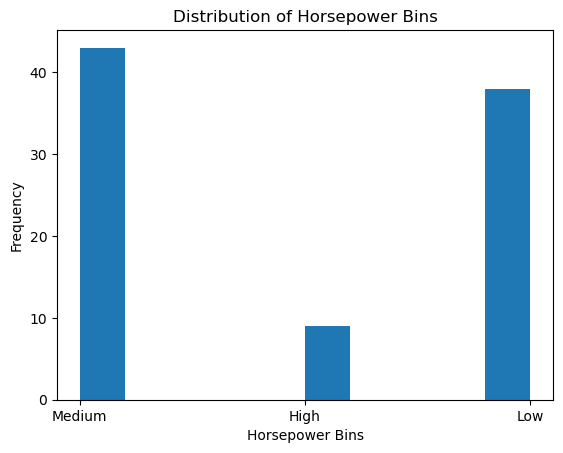

In [17]:
# Step 8: Visualize distribution using a histogram
plt.hist(df['horsepower_bins'])
plt.xlabel('Horsepower Bins')
plt.ylabel('Frequency')
plt.title('Distribution of Horsepower Bins')
plt.show()


In [19]:
# Step 9: Detect outliers using Z-score and remove them
z_scores = np.abs(stats.zscore(df['horsepower']))
outliers = df[(z_scores > 3) | (z_scores < -3)].index
df.drop(outliers, inplace=True)


Index([], dtype='int64')
